<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

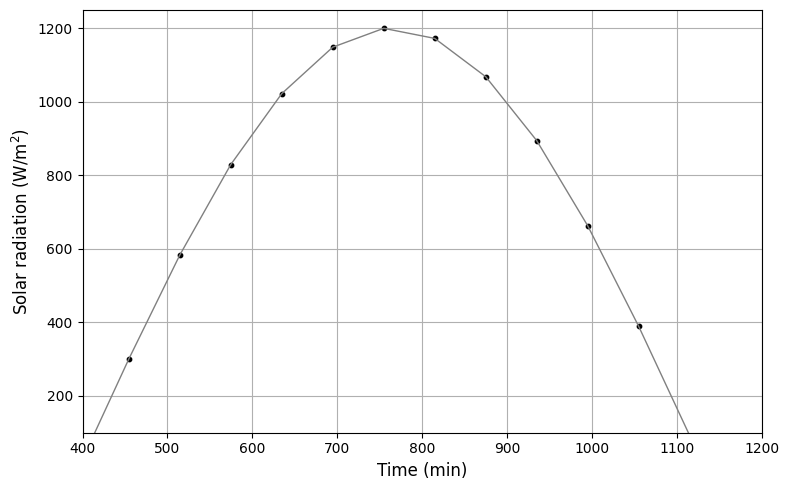

In [4]:
#Example 1.4

import numpy as np
import matplotlib.pyplot as plt


L = 32.22  # Latitude
LOD = 35.27  # Longitude
N = 90  # Day number
T_GMT = +3  # Time difference from GMT
Step = 60  # Step in minutes

# Solar declination
Ds = 23.45 * np.sin((360 * (N - 81) / 365) * (np.pi / 180))

# Equation of time
B = (360 * (N - 81)) / 364
EoT = (9.87 * np.sin(2 * B * np.pi / 180)) - \
      (7.53 * np.cos(B * np.pi / 180)) - \
      (1.5 * np.sin(B * np.pi / 180))

Lzt = 15 * T_GMT
Ts_correction = (-4 * (Lzt - LOD) + EoT) if LOD >= 0 else (4 * (Lzt - LOD) + EoT)

# Sunrise/Sunset
Wsr_ssi = -np.tan(np.radians(Ds)) * np.tan(np.radians(L))
Wsrsr_ss = np.degrees(np.arccos(Wsr_ssi))

ASTsr = abs(((Wsrsr_ss / 15) - 12) * 60)
ASTss = ((Wsrsr_ss / 15) + 12) * 60

Tsr = ASTsr + abs(Ts_correction)
Tss = ASTss + abs(Ts_correction)

# Time range and altitude calculation
LMT = np.arange(Tsr, Tss + Step, Step)
sin_Alpha = []

for t in LMT:
    Ts = t + Ts_correction
    Hs = (15 * (Ts - 12 * 60)) / 60
    sin_Alpha_i = (np.sin(np.radians(L)) * np.sin(np.radians(Ds)) +
                   np.cos(np.radians(L)) * np.cos(np.radians(Ds)) * np.cos(np.radians(Hs)))
    sin_Alpha.append(sin_Alpha_i)

sin_Alpha = np.array(sin_Alpha)

# Solar constant and extraterrestrial irradiance
Go = 1367  # W/m²
Gext = Go * (1 + 0.0333 * np.cos(np.radians(360 * N / 365)))
GextH = Gext * sin_Alpha

# Plot with fine-tuned style
plt.figure(figsize=(8, 5))
plt.plot(LMT, GextH, color='gray', linestyle='-', linewidth=1)
plt.scatter(LMT, GextH, color='black', s=10)
plt.xlabel('Time (min)', fontsize=12)
plt.ylabel(r'Solar radiation (W/m$^2$)', fontsize=12)
plt.xlim(400, 1200)
plt.ylim(100, 1250)
plt.grid(True)
plt.tight_layout()
plt.show()
